In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
df = pd.read_csv('Symptom2Disease.csv') # I've pushed the dataset.csv alogn with this as it's a small file, make sure its in the same working directory when running

In [87]:
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [88]:
df.shape

(1200, 3)

1200 rows across 3 columns. Should do fine for the classification



In [89]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
dtype: int64

No null values, surprising. Time saved in filling null values.


First we need to combine all the symptoms and their coresponding value into a single column so as to feed it to the model



In [90]:
df['text']

0       I have been experiencing a skin rash on my arm...
1       My skin has been peeling, especially on my kne...
2       I have been experiencing joint pain in my fing...
3       There is a silver like dusting on my skin, esp...
4       My nails have small dents or pits in them, and...
                              ...                        
1195    I'm shaking and trembling all over. I've lost ...
1196    Particularly in the crevices of my skin, I hav...
1197    I regularly experience these intense urges and...
1198    I have trouble breathing, especially outside. ...
1199    I constantly sneeze and have a dry cough. My i...
Name: text, Length: 1200, dtype: object

In [91]:
df['text'][0]

'I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'

In [92]:
X = df['text']
y = df['label']

In [93]:
X.shape, y.shape

((1200,), (1200,))

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 43)

In [96]:
X_train.shape, y_train.shape

((960,), (960,))

In [97]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [98]:
log_reg = LogisticRegression()

In [99]:
log_reg.fit(X_train_vectorized,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
y_pred = log_reg.predict(X_test_vectorized)

In [101]:
log_reg_accuracy = accuracy_score(y_pred, y_test)

In [102]:
log_reg_accuracy

0.9791666666666666

In [103]:
from sklearn.naive_bayes import MultinomialNB

naive_b = MultinomialNB()
naive_b.fit(X_train_vectorized, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [104]:
naive_b_pred = naive_b.predict(X_test_vectorized)

In [ ]:
accuracy_score(naive_b_pred, y_test)


0.9208333333333333

In [112]:
confusion_matrix(y_pred, y_test)

array([[ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

From these most common classification models Multiple Logistic Regression seems to give us better results so, lets stick with Logistic Regression


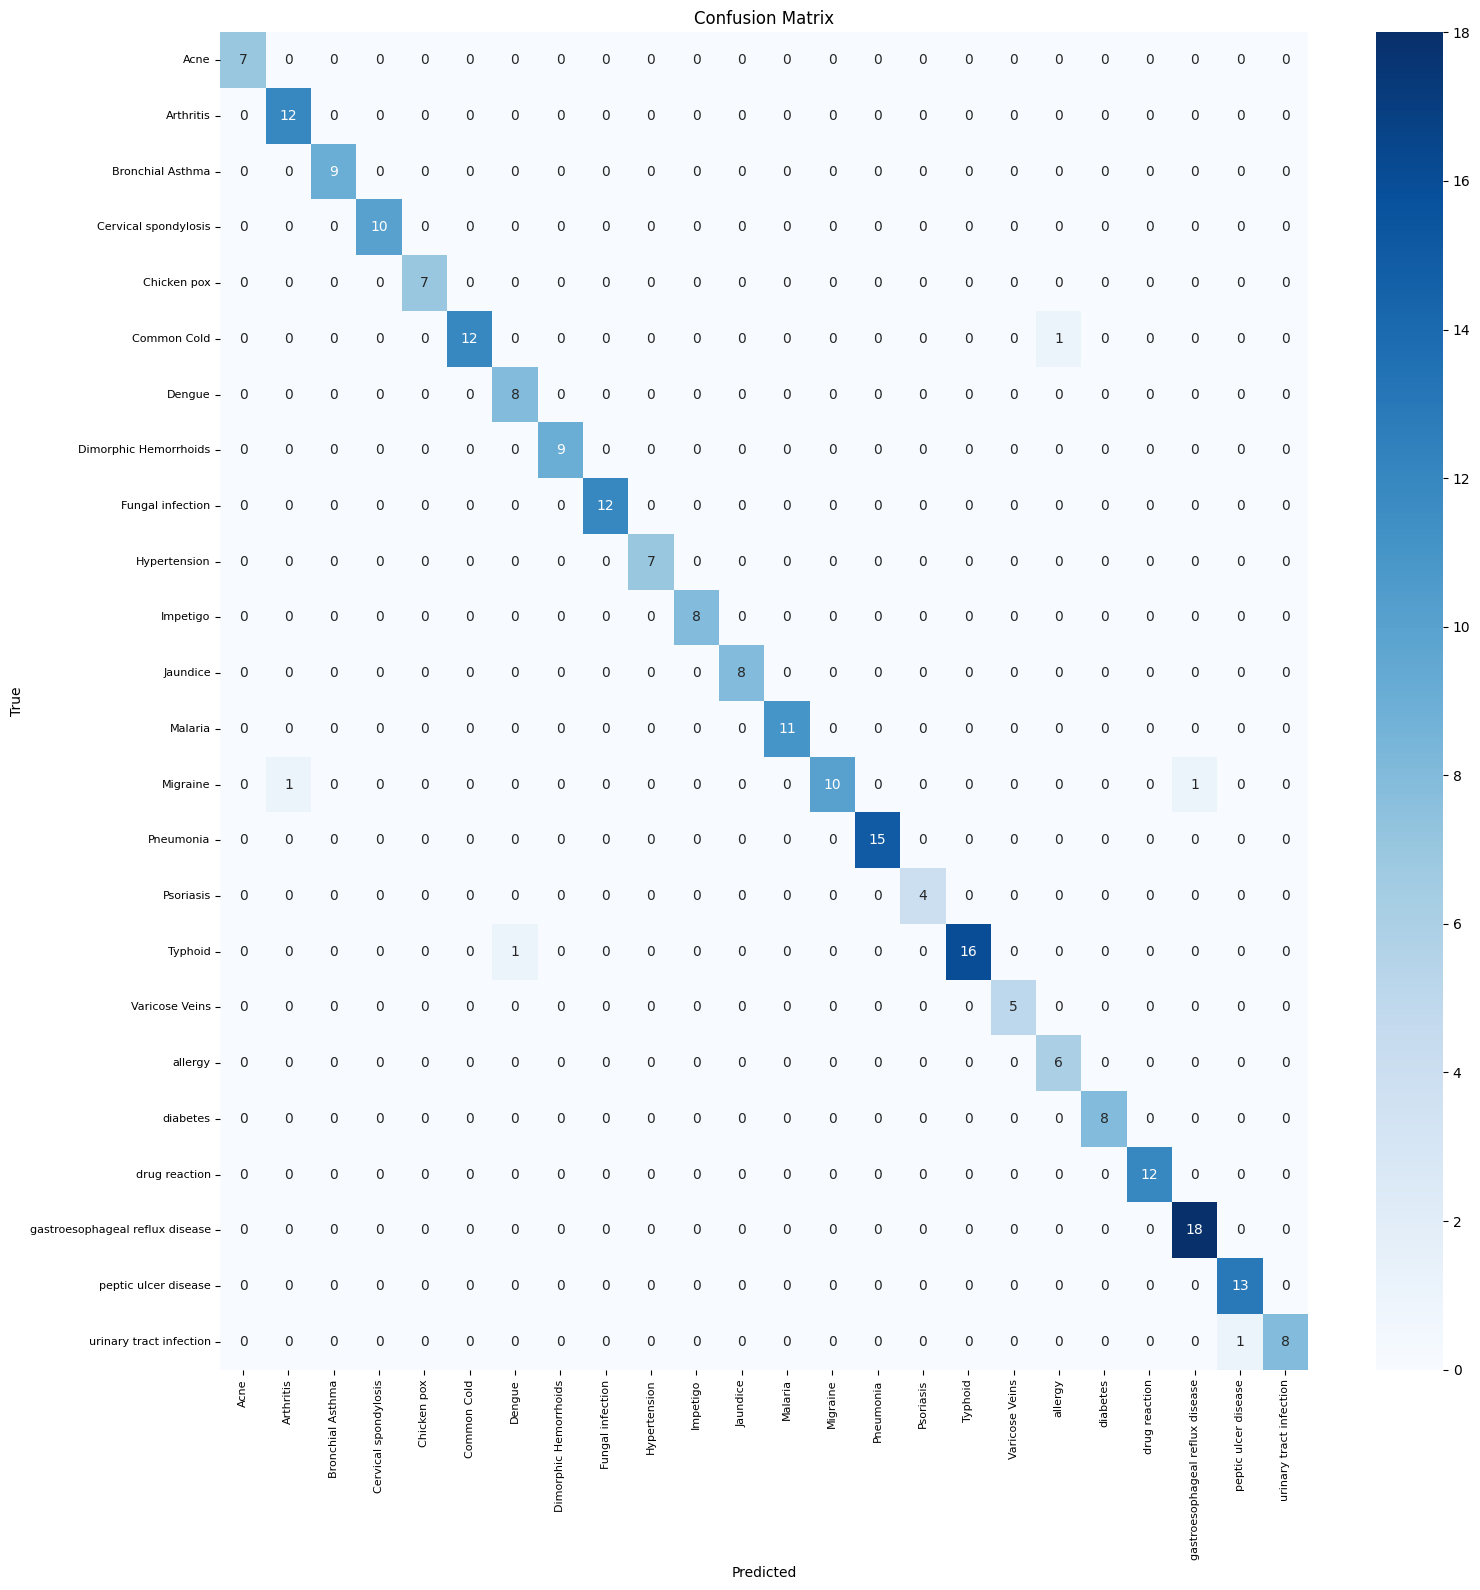

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

# Plot
plt.figure(figsize=(16, 16))  # big enough for many classes

sns.heatmap(
    cm,
    xticklabels=log_reg.classes_,
    yticklabels=log_reg.classes_,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Rotate x-labels for readability
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig("confusion_matrix_better.png")
plt.show()

In [111]:
text = 'I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'

text_v = vectorizer.transform([text])

log_reg.predict(text_v)

array(['Psoriasis'], dtype=object)